In [1]:
import pandas as pd
import numpy as np
import torch


In [2]:
df_16_17=pd.read_excel("C:/Users/nnak/Downloads/Actual Generation per Production Type_201601010000-201701010000 (1).xlsx",header=7)
df_17_18=pd.read_excel("C:/Users/nnak/Downloads/Actual Generation per Production Type_201701010000-201801010000 (1).xlsx",header=7)
df_18_19=pd.read_excel("C:/Users/nnak/Downloads/Actual Generation per Production Type_201801010000-201901010000.xlsx",header=7)
df_19_20=pd.read_excel("C:/Users/nnak/Downloads/Actual Generation per Production Type_201901010000-202001010000 (2).xlsx",header=7)


,Unnamed: 0,D,D.1,D.2,D.3,D.4,D.5,D.6,D.7,D.8,...,D.11,D.12,D.13,D.14,D.15,D.16,D.17,D.18,D.19,D.20
0,00:00 - 01:00,216.0,n/e,241.0,5034.0,1719.0,519.0,n/e,n/e,706.0,...,1163.0,81.0,n/e,n/e,9324.0,n/e,1.0,46.0,n/e,218.0
1,01:00 - 02:00,217.0,n/e,241.0,4486.0,1728.0,530.0,n/e,n/e,706.0,...,1089.0,20.0,n/e,n/e,8739.0,n/e,0.0,44.0,n/e,267.0
2,02:00 - 03:00,216.0,n/e,241.0,4275.0,1727.0,467.0,n/e,n/e,705.0,...,1010.0,20.0,n/e,n/e,8195.0,n/e,0.0,39.0,n/e,227.0
3,03:00 - 04:00,215.0,n/e,241.0,3926.0,1658.0,426.0,n/e,n/e,707.0,...,988.0,20.0,n/e,n/e,7876.0,n/e,0.0,44.0,n/e,212.0
4,04:00 - 05:00,215.0,n/e,241.0,3934.0,1658.0,407.0,n/e,n/e,706.0,...,1001.0,24.0,n/e,n/e,7744.0,n/e,0.0,41.0,n/e,223.0


In [3]:
df_total=pd.concat([df_16_17, df_17_18,df_18_19,df_19_20], ignore_index=True)

In [4]:
df_total.head(35)


,Unnamed: 0,D,D.1,D.2,D.3,D.4,D.5,D.6,D.7,D.8,...,D.11,D.12,D.13,D.14,D.15,D.16,D.17,D.18,D.19,D.20
0,00:00 - 01:00,216.0,n/e,241.0,5034.0,1719.0,519.0,n/e,n/e,706.0,...,1163.0,81.0,n/e,n/e,9324.0,n/e,1.0,46.0,n/e,218.0
1,01:00 - 02:00,217.0,n/e,241.0,4486.0,1728.0,530.0,n/e,n/e,706.0,...,1089.0,20.0,n/e,n/e,8739.0,n/e,0.0,44.0,n/e,267.0
2,02:00 - 03:00,216.0,n/e,241.0,4275.0,1727.0,467.0,n/e,n/e,705.0,...,1010.0,20.0,n/e,n/e,8195.0,n/e,0.0,39.0,n/e,227.0
3,03:00 - 04:00,215.0,n/e,241.0,3926.0,1658.0,426.0,n/e,n/e,707.0,...,988.0,20.0,n/e,n/e,7876.0,n/e,0.0,44.0,n/e,212.0
4,04:00 - 05:00,215.0,n/e,241.0,3934.0,1658.0,407.0,n/e,n/e,706.0,...,1001.0,24.0,n/e,n/e,7744.0,n/e,0.0,41.0,n/e,223.0
5,05:00 - 06:00,213.0,n/e,241.0,4256.0,1595.0,459.0,n/e,n/e,706.0,...,1057.0,36.0,n/e,n/e,7885.0,n/e,0.0,43.0,n/e,213.0
6,06:00 - 07:00,256.0,n/e,241.0,4275.0,1685.0,490.0,n/e,n/e,707.0,...,1123.0,80.0,n/e,n/e,7966.0,n/e,49.0,40.0,n/e,206.0
7,07:00 - 08:00,256.0,n/e,241.0,3867.0,1661.0,492.0,n/e,n/e,706.0,...,1272.0,138.0,n/e,n/e,7988.0,n/e,576.0,40.0,n/e,188.0
8,08:00 - 09:00,256.0,n/e,241.0,3778.0,1670.0,544.0,n/e,n/e,707.0,...,1288.0,124.0,n/e,n/e,8308.0,n/e,1926.0,42.0,n/e,139.0
9,09:00 - 10:00,256.0,n/e,241.0,3875.0,1731.0,539.0,n/e,n/e,707.0,...,1181.0,114.0,n/e,n/e,8335.0,n/e,3271.0,41.0,n/e,106.0


In [5]:
df_total.dropna(inplace=True)

In [6]:
df_total=df_total.replace('n/e', np.nan)

In [7]:
df_total.dropna(inplace=True,axis=1)

In [8]:
df_total.drop('Unnamed: 0', inplace=True, axis=1)

In [9]:
energy_values=df_total.values

In [10]:

# multivariate data preparation
from numpy import array
from numpy import hstack
 
def create_inout_sequences(input_data_x,input_data_y, tw):
    inout_seq_x = []
    inout_seq_y= []

    L = len(input_data_x)
    for i in range(L-tw):
        train_seq = input_data_x[i:i+tw]
        train_label = input_data_y[i+tw:i+tw+1]
        inout_seq_x.append((train_seq))
        inout_seq_y.append(train_label)

    return inout_seq_x,inout_seq_y

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(energy_values, energy_values, test_size=0.2, shuffle=False)

In [13]:
X_test.shape

(4873, 14)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [15]:
X_train_sc=scaler.transform(X_train)
X_test_sc=scaler.transform(X_test)


In [16]:
X_train_seq,y_train_seq=create_inout_sequences(torch.from_numpy(X_train_sc),torch.from_numpy(y_train),48)

In [17]:
X_test_seq,y_test_seq=create_inout_sequences(torch.from_numpy(X_test_sc),torch.from_numpy(y_test),48)

In [18]:
y_test_f=torch.cat(y_test_seq)
y_train_f=torch.cat(y_train_seq)


In [19]:
train_x=[]
for x in X_train_seq:
    train_x.append(x.unsqueeze(0))
test_x=[]
for x in X_test_seq:
    test_x.append(x.unsqueeze(0))

In [20]:
X_test_f=torch.cat(test_x)
X_train_f=torch.cat(train_x)

In [21]:
from torch.utils.data import Dataset, DataLoader


class TimeSeriesDataSet(Dataset):

    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
        if len(self.X) != len(self.Y):
            raise Exception("The length of X does not match the length of Y")

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
    # note that this isn't randomly selecting. It's a simple get a single item that represents an x and y
        _x = self.X[index]
        _y = self.Y[index]

        return _x, _y

In [22]:
loader = DataLoader(TimeSeriesDataSet(X_train_f, y_train_f), batch_size=32, shuffle=True)


In [23]:
torch.set_default_tensor_type('torch.FloatTensor')

In [24]:
class MV_LSTM(torch.nn.Module):
    def __init__(self,n_features,seq_length):
        super(MV_LSTM, self).__init__()
        self.n_features = n_features
        self.seq_len = seq_length
        self.n_hidden = 256 # number of hidden states
        self.n_layers = 1 # number of LSTM layers (stacked)
        self.soft=torch.nn.Softplus()
        self.l_lstm = torch.nn.LSTM(input_size = n_features, 
                                 hidden_size = self.n_hidden,
                                 num_layers = self.n_layers, 
                                 batch_first = True).to(device)
        # according to pytorch docs LSTM output is 
        # (batch_size,seq_len, num_directions * hidden_size)
        # when considering batch_first = True
        self.l_linear = torch.nn.Linear(self.n_hidden*self.seq_len, self.n_features).to(device)
        
    
    def init_hidden(self, batch_size):
        # even with batch_first = True this remains same as docs
        hidden_state = torch.zeros(self.n_layers,batch_size,self.n_hidden).to(device)
        cell_state = torch.zeros(self.n_layers,batch_size,self.n_hidden).to(device)
        self.hidden = (hidden_state, cell_state)
    
    
    def forward(self, x):        
        batch_size, seq_len, _ = x.size()
        
        lstm_out, self.hidden = self.l_lstm(x,self.hidden)
        # lstm_out(with batch_first = True) is 
        # (batch_size,seq_len,num_directions * hidden_size)
        # for following linear layer we want to keep batch_size dimension and merge rest       
        # .contiguous() -> solves tensor compatibility error
        x = lstm_out.contiguous().view(batch_size,-1)
        x_lin=self.l_linear(x)
        return self.soft(x_lin)

In [25]:
import matplotlib.pyplot as plt
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## Do not run the next Block

In [26]:
n_features = 14 # this is number of parallel inputs
n_timesteps = 48 # this is number of timesteps


mv_net = MV_LSTM(n_features,n_timesteps).float().to(device)
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.Adam(mv_net.parameters(), lr=0.001)

train_episodes = 2000
mv_net=mv_net.float().to(device)
mv_net.train()
train_loss=[]
test_loss=[]
for t in range(1000):
    l_s=0
    for x_train,y_train in loader:
   
        
       
        mv_net.init_hidden(x_train.size(0))
  
        output = mv_net(x_train.float().to(device)) 
        loss = criterion(output, y_train.float().to(device))  
        loss.backward()
        optimizer.step()   
        l_s+=loss.data/len(loader)
        optimizer.zero_grad()
    
    train_loss.append(l_s)
    mv_net.init_hidden(X_test_f.size(0))
    mv_net.eval()
    output = mv_net(X_test_f.float().to(device)) 
    loss_t = criterion(output, y_test_f.float().to(device))
    mv_net.train() 
    test_loss.append(loss_t.data)

    if t%100==0:
        print('step : ' , t , 'train loss : ' , l_s.item())
        
       
        print('step : ' , t , 'test loss : ' , loss_t.item())
        plt.plot(train_loss)
        plt.show()
        plt.plot(test_loss)
        plt.show()

KeyboardInterrupt: 

In [63]:
mv_net.init_hidden(X_test_f[0].unsqueeze(0).size(0))

output = mv_net(X_test_f[0].unsqueeze(0).float().to(device)) 


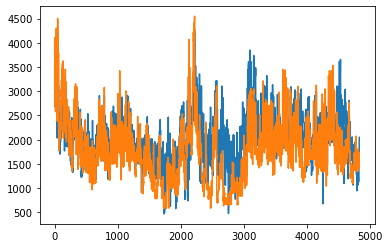

In [343]:
plt.plot(output[:,3].detach().cpu().data)
plt.plot(y_test_f[:,3].detach().cpu().data)

In [61]:
output


tensor([[  478.4483,   626.6216,  7214.3770,  ...,     0.0000,    35.6709,
          5237.0869],
        [  483.3511,   599.4086,  7328.2012,  ...,     0.0000,    33.5423,
          4741.6191],
        [  494.2758,   613.6646, 11566.6602,  ...,   229.9010,    33.0872,
          4656.2773],
        ...,
        [  596.3867,   677.8245,  7821.5098,  ...,  1609.3213,    37.0370,
          2787.7236],
        [  598.1152,   677.9958,  8145.1025,  ...,  4329.7793,    38.1443,
          2027.5133],
        [  583.5069,   656.1603,  7088.3330,  ...,  5262.3672,    37.8267,
          1195.3337]], device='cuda:0', grad_fn=<SoftplusBackward>)

In [34]:
X_test_f.shape

torch.Size([4825, 48, 14])

In [339]:
#Here we save the model as a dictionary

#torch.save(mv_net.state_dict(),'trained_energy')

In [40]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# these need to stay like this

n_features = 14 # this is number of input time series
n_timesteps = 48 # this is number of timesteps (hours)
#initializing the object
mv_net = MV_LSTM(n_features,n_timesteps).float().to(device)
#insert the trained model from the saved dictionary
mv_net.load_state_dict(t# these need to stay like this

n_features = 14 # this is number of input time series
n_timesteps = 48 # this is number of timesteps (hours)
#initializing the object
mv_net = MV_LSTM(n_features,n_timesteps).float().to(device)
#insert the trained model from the saved dictionary
mv_net.load_state_dict(torch.load('trained_energy'))
orch.load('trained_energy'))

#make the network in evaluation mode
mv_net.eval()

MV_LSTM(
  (soft): Softplus(beta=1, threshold=20)
  (l_lstm): LSTM(14, 256, batch_first=True)
  (l_linear): Linear(in_features=12288, out_features=14, bias=True)
)

In [91]:
X_test_example=X_test_f[0]

# X is the input to the model, needs to be a Tensor of shape [48, 14]
def predict(X_init):
    mv_net.init_hidden(X_init.unsqueeze(0).size(0))
    X=mv_net(X_init.unsqueeze(0).float().to(device))
        
    return X
        

    

In [93]:
predictions=predict(X_test_example)



What we predict: Biomass, Fossil Coal-derived gas,	Fossil Gas,	Fossil Hard coal,	Fossil Oil	,	Geothermal	,Hydro Pumped Storage,		Hydro Run-of-river and poundage	Hydro Water Reservoir	,	Other	,Solar,	Waste,		Wind Onshore


In [95]:


predictions

tensor([[5.0469e+02, 6.0068e+02, 7.3175e+03, 2.8063e+03, 4.0740e-20, 6.4547e+02,
         0.0000e+00, 7.5658e+02, 1.5143e+03, 2.5270e+02, 1.9219e+03, 0.0000e+00,
         3.3721e+01, 5.0641e+03]], device='cuda:0', grad_fn=<SoftplusBackward>)